In [ ]:
# Install necessary libraries
!pip install -q ngrok seaborn matplotlib wordcloud scattertext nltk textblob

# Imports
import itertools  # Importing itertools for advanced iteration functions
import collections  # Importing collections for specialized container datatypes
import seaborn as sns  # Importing seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
from wordcloud import WordCloud  # Importing WordCloud for creating word clouds
import scattertext as st  # Importing scattertext for visualizing linguistic variation
from IPython.display import IFrame  # Importing IFrame for embedding content in IPython
from IPython.core.display import display, HTML  # Importing display and HTML for interactive output
from scattertext import CorpusFromPandas, produce_scattertext_explorer  # Importing scattertext utilities
import pandas as pd  # Importing pandas for data manipulation and analysis
import nltk  # Importing NLTK for natural language processing tasks
from textblob import TextBlob  # Import TextBlob for sentiment analysis
import pickle  # Importing pickle for object serialization
import json  # Importing json for handling JSON data

# Download NLTK resources
nltk.download('punkt')  # Downloading punkt tokenizer models
nltk.download('wordnet')  # Downloading WordNet for lemmatization
nltk.download('stopwords')  # Downloading stopwords for text processing
stopwords = nltk.corpus.stopwords.words('english')  # Loading English stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# IMPORT Dataset
tweets = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')  # Reading CSV file into a Pandas DataFrame
tweets.head()  # Displaying the first few rows of the DataFrame

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [ ]:
# Function to remove stopwords
def remove_stopwords(float_object):
    # Serialize the float object to a string.
    string_object = json.dumps(float_object)
    # Split the string into words.
    words = string_object.split()
    # Remove stop words
    filtered_words = [word for word in words if word not in stopwords]
    # Join the filtered words back into a string.
    return ' '.join(filtered_words)

# Data Cleaning and Preprocessing
tweets = tweets[['Review Text','Rating']].copy()  # Extracting relevant columns
tweets.columns = ['Text','Rating']  # Renaming columns for simplicity
tweets['Text'] = tweets['Text'].str.lower()  # Converting text to lowercase
tweets['Text'] = tweets['Text'].str.replace(r"http\s+","", regex = True)  # Removing URLs
tweets['Text'] = tweets['Text'].str.replace('[^A-Za-z0-9]+', ' ', regex = True)  # Removing special characters
tweets['Text'] = tweets['Text'].apply(remove_stopwords)  # Applying remove_stopwords function
tweets['Text'] = tweets['Text'].str.replace('[^A-Za-z0-9]+', ' ', regex = True)  # Removing special characters again
tweets.head()  # Displaying the first few rows of the cleaned DataFrame

Text  Rating
0       absolutely wonderful silky sexy comfortable        4
1   love dress sooo pretty happened find store gl...       5
2   i high hopes dress really wanted work initial...       3
3   i love love love jumpsuit fun flirty fabulous...       5
4   this shirt flattering due adjustable front ti...       5

In [ ]:
# Tokenization and Lemmatization
for index, row in tweets.iterrows():
    row['Text'] = json.dumps(row['Text'])
nltk_tokens = tweets['Text'].apply(nltk.word_tokenize)  # Tokenizing the text
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()  # Tokenizing using whitespace
lemmatizer = nltk.stem.WordNetLemmatizer()  # Initializing the WordNet lemmatizer
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]  # Lemmatizing the text
tweets['lemmatized_tokens'] = tweets['Text'].apply(lemmatize_text)  # Applying lemmatization
tweets['word_length'] = tweets['Text'].str.split().str.len()  # Counting the number of words
tweets.head()  # Displaying the first few rows of the DataFrame with lemmatized tokens

Text  Rating  \
0       absolutely wonderful silky sexy comfortable        4   
1   love dress sooo pretty happened find store gl...       5   
2   i high hopes dress really wanted work initial...       3   
3   i love love love jumpsuit fun flirty fabulous...       5   
4   this shirt flattering due adjustable front ti...       5   

                                   lemmatized_tokens  word_length  
0  [absolutely, wonderful, silky, sexy, comfortable]            5  
1  [love, dress, sooo, pretty, happened, find, st...           31  
2  [i, high, hope, dress, really, wanted, work, i...           49  
3  [i, love, love, love, jumpsuit, fun, flirty, f...           15  
4  [this, shirt, flattering, due, adjustable, fro...           17

In [ ]:
# Plotting Word Length Density
sns.set(color_codes=True)  # Setting color codes for seaborn
plt.figure(figsize=(15,7))  # Setting the figure size
cmap = ["red", "orange",  "purple", "blue", "green"]  # Defining colors for different ratings
labels = [1, 2, 3, 4, 5]  # Assuming your dataset has ratings from 1 to 5

for label, clr in zip(labels, cmap):
    sns.kdeplot(tweets.loc[tweets['Rating'] == label, 'word_length'], color=clr, fill=True, label=str(label))

plt.xlabel('Text Length')  # Setting the x-axis label
plt.ylabel('Density')  # Setting the y-axis label
plt.legend()  # Displaying legend
plt.show()  # Showing the plot

In [ ]:
# # Extract lemmatized tokens and create a flat list
# lemmatized_tokens = list(tweets['lemmatized_tokens'])
# token_list = list(itertools.chain(*lemmatized_tokens))

# # Count the occurrences of each word using Counter
# count_no = collections.Counter(token_list)

# # Create a DataFrame with the most common words and their counts
# clean_tweets = pd.DataFrame(count_no.most_common(30), columns=['words', 'count'])

# # Create a horizontal bar plot to visualize the most frequently used words
# fig, ax = plt.subplots(figsize=(8, 8))
# clean_tweets.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="blue")

# # Set the title of the plot
# ax.set_title("Most Frequently Used Words in Ratings")

# # Display the plot
# plt.show()

In [ ]:
# # Join the tokens into a single string
# text = ' '.join(token_list)  # Combine lemmatized tokens into a single string

# # Generate WordCloud
# wordcloud = WordCloud(width=1200, height=800,
#                       background_color='white',
#                       stopwords=stopwords,
#                       min_font_size=10).generate(text)  # Generate WordCloud with specified parameters

# # Plot WordCloud
# plt.figure(figsize=(15, 8), facecolor=None)
# plt.imshow(wordcloud)  # Display the WordCloud
# plt.axis("off")  # Turn off axis
# plt.tight_layout(pad=0)  # Set layout parameters

# plt.show()  # Display the WordCloud

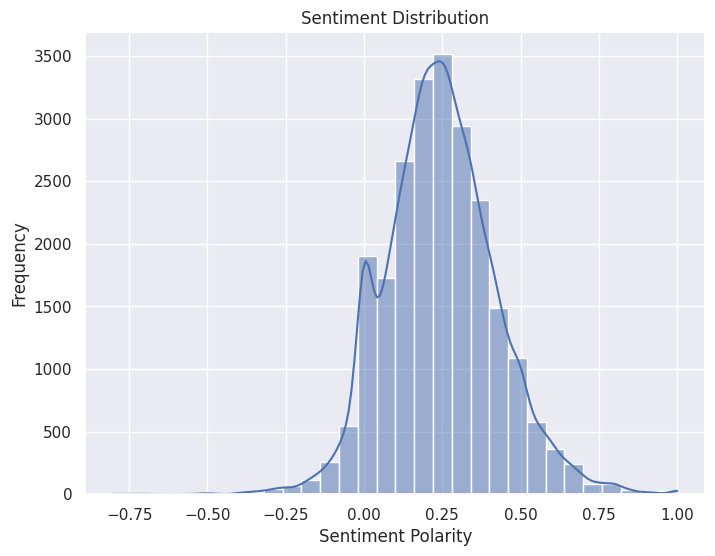

In [ ]:
# Create a new column for sentiment based on ratings using textblob
tweets['Sentiment'] = tweets['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)  # Calculate sentiment using TextBlob

# Save the TextBlob model
model_filename = '/content/drive/MyDrive/textblob_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(TextBlob, model_file)  # Save the TextBlob model for future use

# Later, load the TextBlob model back
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)  # Load the TextBlob model back

# Display sentiment distribution
plt.figure(figsize=(8, 6))
sns.histplot(tweets, x='Sentiment', kde=True, bins=30)  # Plot sentiment distribution
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()  # Display the sentiment distribution plot

In [ ]:
# Get sentiment predictions for each review using TextBlob
tweets['Sentiment_Polarity'] = tweets['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)  # Calculate sentiment polarity

# Map sentiment polarity to categories
tweets['Sentiment_Category'] = pd.cut(tweets['Sentiment_Polarity'], bins=[-1, -0.2, 0.2, 1], labels=['Negative', 'Neutral', 'Positive'])

# Create a corpus using the sentiment categories
corpus = st.CorpusFromPandas(tweets,
                              category_col='Sentiment_Category',
                              text_col='Text',
                              nlp=st.whitespace_nlp_with_sentences
                             ).build()

# Produce Scattertext Explorer
html = st.produce_scattertext_explorer(corpus,
                                       category='Negative',
                                       category_name='Negative',
                                       not_category_name='Positive',
                                       width_in_pixels=1000,
                                       metadata=tweets['Sentiment_Polarity'],
                                       transform=st.Scalers.log_scale_standardize)

HTML(html)  # Display the Scattertext Explorer as HTML

In [ ]:
# Save HTML file to Google Drive
file_path = '/content/drive/MyDrive/Sentimental_Analysis_of_Ratings_TextBlob.html'
with open(file_path, 'w', encoding='utf-8') as f:
    f.write(html)  # Save the HTML content to a file

file_path

'/content/drive/MyDrive/Sentimental_Analysis_of_Ratings_TextBlob.html'